In [154]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Task 1

In [145]:
from glob import glob

dfs = pd.DataFrame()
all_csv_files = glob('data/**/*.csv', recursive=True)
for csv_file in all_csv_files:
    df = pd.read_csv(csv_file, usecols=[1, 2])
    df['date'], df['name'] = csv_file.split('/')[1:3]
    dfs = pd.concat([dfs, df])


In [185]:
df

,product_id,quantity,date,name
0,82,4,2020-12-09,Vasiliy_Ivanov
1,74,2,2020-12-09,Vasiliy_Ivanov
2,54,3,2020-12-09,Vasiliy_Ivanov


In [135]:
dfs.quantity.sum()
#answer

480

## Task 2

In [147]:
(
    dfs
     .groupby('name', as_index=False)
     .agg(products= ('quantity', 'sum'))
     .sort_values(by = 'products', ascending=False)
)
# answer 
# Alexey_Smirnov, Petr_Smirnov

,name,products
3,Alexey_Smirnov,52
13,Petr_Smirnov,52
6,Anton_Smirnov,45
10,Petr_Fedorov,34
7,Kirill_Fedorov,28
16,Rostislav_Petrov,28
19,Vasiliy_Ivanov,27
0,Alexey_Fedorov,24
4,Anton_Ivanov,23
11,Petr_Ivanov,21


## Task 3

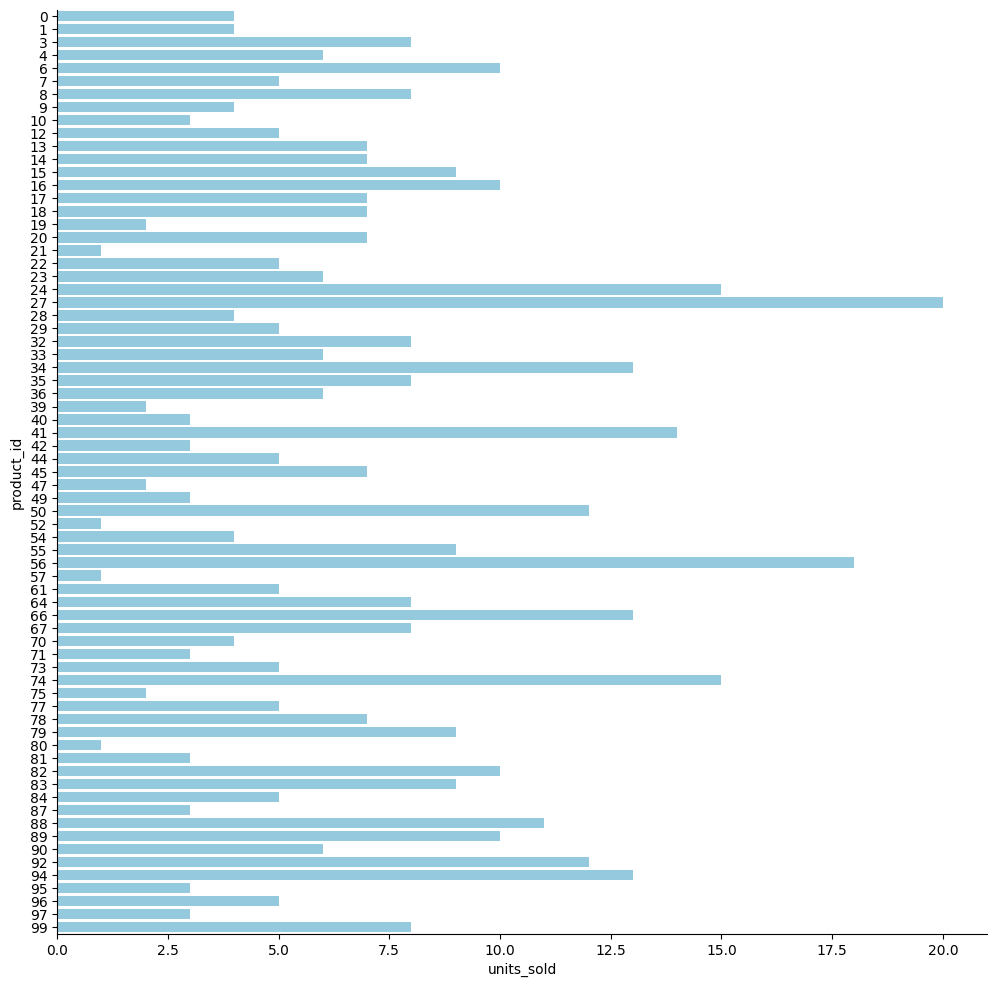

In [175]:
products = (
    dfs
     .groupby('product_id', as_index=False)
     .agg(units_sold = ('quantity', 'sum'))
)

plt.figure(figsize=(12, 12))
sns.barplot(data=products, y='product_id', x='units_sold', orient='h', color='skyblue')
sns.despine()
plt.show()

In [166]:
products.query('product_id == 56').units_sold
# answer 
# 18

42    18
Name: units_sold, dtype: int64

## Task 4

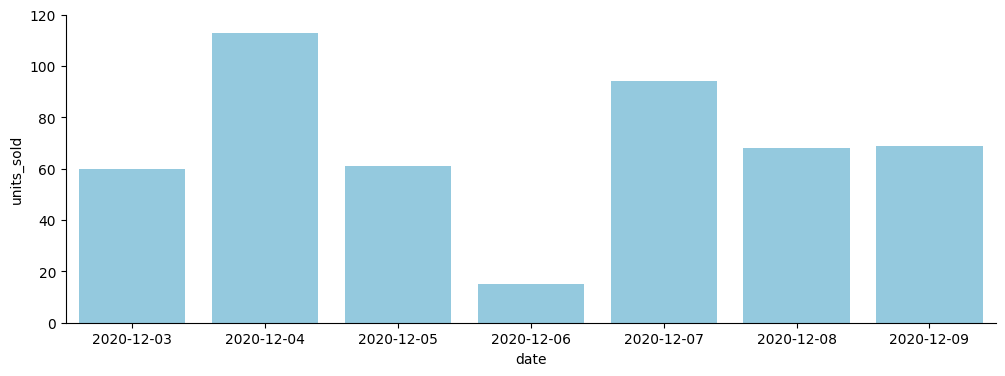

In [176]:
products = (
    dfs
     .groupby('date', as_index=False)
     .agg(units_sold = ('quantity', 'sum'))
)

plt.figure(figsize=(12, 4))
sns.barplot(data=products, x='date', y='units_sold', color = 'skyblue')
sns.despine()
plt.yticks(range(0, 140, 20))
plt.show()

In [ ]:
# answer
# 1. Максимальное число товаров было продано 4 декабря
# 2. Меньше всего товаров было приобретено 6 декабря
# 3. 4 декабря было куплено почти в два раза больше товаров, чем в предыдущий день
# 4. 8 и 9 декабря было продано примерно одинаковое число товаров



## Task 5

In [195]:
non_duplicate = dfs.drop_duplicates(subset=['product_id', 'date', 'name'])
non_duplicate.loc[non_duplicate.duplicated(subset=['product_id', 'name'])]
# anwer - 2

,product_id,quantity,date,name
1,94,4,2020-12-07,Petr_Fedorov
4,15,3,2020-12-09,Anton_Ivanov
